# Laboration 3 part 1 Regression

In this part of laboration 3 you will perform some different types of regression analysis on a dataset with weather data. Feel free to watch the lecture videos for the lecture on supervised learning that goes through regression (part 2 and 4 are most important).

In the laboratory, only questions that have a **Q** in front should be answered (You may have to do some coding to be able to answer the question in some cases while in others there is only theoretical questions.).

Tasks that are not questions but only coding are marked with **C**, these are also mandatory.

Example:

**Q** How many men and women have answered the survey? (Here it is preferable to do some coding to easily find the answer.)

**C** Encode a function that calculates the 20 most common words in your data set.

*When we correct the laboration we will not look specifically on how you did your coding to answer questions, but look at whether the answer is correct or not when it comes to questions marked with **Q** .*

**You are expected to add code blocks or text (markdown) blocks when needed. Make sure to use enough cells to make you code easy to read i.e. try to only make one thing in each cell.**

An initial import of a few of the required libraries is already coded, below. When you need other libraries you can add them in this cell or in the cell where you need them further in the lab.

In [1]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data

Start by:
**C** Importing our dataset and store it in a suitable format with the name `weather_data`.

In [6]:
# Import our WeatherData and store it in the variable weather_data
weather_data = pd.read_csv("https://raw.githubusercontent.com/2IS239-Data-Analytics/ht-23-lab3-grupp-3/master/Data/WeatherData_lab3.csv?token=GHSAT0AAAAAACHHFDC4KZI4Q563M6XG3YAIZJCSFHA", sep=';')
# Display the data in the notebook
weather_data.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Sunshine,Cloud,RainToday,Visibility (km)
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,No,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,No,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,No,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,No,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,No,15.8263


## Exploratory analysis


**Q** What type of data is in the dataset? (HINT! dtype and type of variable: categorial/continous)



**Q** How many rows and columns, number of datapoints?

**Q** How do you interpret the different columns, write a short sentence that describes each column.

**C** Rename columns that have unsuitable names for the columns or if the columns have names that are difficult to interpret. (If everything looks good, you don't need to do anything here)

**C** Code suitable visualisations that show the relationship between the different variables in the dataset (in two dimensions). Include labels on x and y axis and display a legend for the visualisation(s). You can choose if you want to visualise each relationship in its own plot or if you want to plot all relationships in one visualisation, if you choose the latter, you need to make it possible to distinguish between the different variables.

**Q** What kinds of relationship can you see between the different variables?

 **Svar:**
scatterplotten visar sambandet mellan temperatur och luftfuktighet.Det finns ett  samband mellan temperatur och luftfuktighet som troligvis innebär att när temperaturen ökar så ökar också luftfuktigheten.


In [3]:
#Q1 - alla är float förutom RainToday som är object.


weather_data.dtypes

Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
Sunshine                float64
Cloud                   float64
RainToday                object
Visibility (km)         float64
dtype: object

In [4]:
#Q2 - 50 rader 8 kolumner
weather_data.shape

(50, 8)

In [18]:
weather_data.rename(columns={'Temperature (C)':'Temperature'}, inplace=True)
weather_data.rename(columns={'Wind Speed (km/h)':'Wind_Speed'}, inplace=True)
weather_data.rename(columns={'Pressure (millibars)':'Pressure'}, inplace=True)
weather_data.rename(columns={'Visibility (km)':'Visibility'}, inplace=True)
weather_data.dtypes

Temperature    float64
Wind_Speed     float64
Pressure       float64
Humidity       float64
Sunshine       float64
Cloud          float64
RainToday       object
Visibility     float64
dtype: object

**Q3** -

Temperatur (C) - Temperaturen i Celsiusgrader.

Vindhastighet (km/h) - Vindhastigheten i kilometer per timme.

Tryck (millibar) - Lufttrycket i millibar.

Luftfuktighet - Luftfuktigheten som en decimal där till exempel 0.89 motsvarar 89% fuktighet i luften

Solens sken - Mängden solljus som en decimal där till exempel 0.86 motsvarar 86% sol den dagen.

Moln - Molntäckning som en siffra

Regn idag - Om det har regnat idag ( ja eller nej) Sikt (km) - Siktbarheten i kilometer.

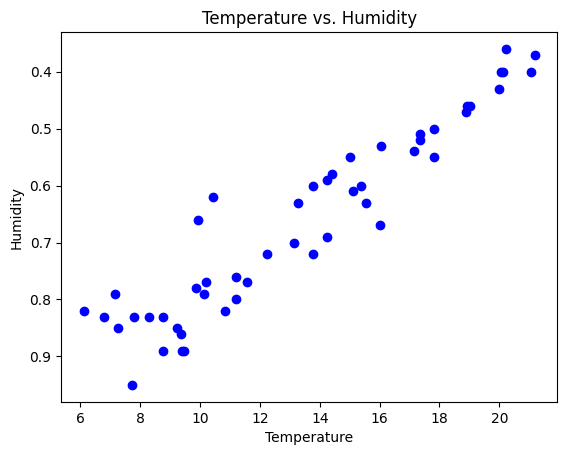

In [37]:

weather_feature = ['Temperature']
X = weather_data[weather_feature]
y = weather_data.Humidity

plt.scatter(X['Temperature'], y, color='blue', label='Temperature vs. Humidity')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')

# invertera, ser lägre luftfuktighet ju högre värme.
plt.gca().invert_yaxis()



## Data cleaning and feature engineering

**Q** Are there any missing values? If yes, what is your interpretation of the reason(s) and what type of missing values? (HINT! MCAR;MAR;NMAR)

Svar:
Ja,det finns saknade värden i datamängden.Värdena för kolumnerna Sunshine och Cloud har många saknade värden. Det är svårt att säga säkert varför dessa värden saknas kanske för att det inte var prioterat.
De saknade värdena är NMAR (missing not at random), vilket innebär att de saknas beroende av någon annan variabel i datamängden, men på ett sätt som inte är observerbart.

**C** Handle any missing values in a suitable way (if there are none, you don't need to do anything here). Make sure you changes are saved in your dataframe.

**Q** Are there any variables that need further cleaning/feature engineering such as changing dtype/calculations to improve categorial features etc?

**Q** Is there a need fo standardization/normalization or scaling of variables? Why/why not? (Motivate for each of them)

**C** If yes on any of the above, fix this column and make sure to make the changes on your existing dataframe.



In [38]:
weather_data['Cloud'].fillna(0, inplace=True)
weather_data['Sunshine'].fillna(0, inplace=True)
weather_data['RainToday'].fillna(0, inplace=True)
weather_data['RainToday'] = weather_data['RainToday'].replace({'Yes': 1, 'No': 0}).astype(float)

weather_data[weather_data.isna().any(axis=1)]

,Temperature,Wind_Speed,Pressure,Humidity,Sunshine,Cloud,RainToday,Visibility


## Linear Regression

### Your first task in regards to modeling is to do a simple linear regression, using only two of the variables present in the dataset.

To help you further the codeblock below show a heatmap of the correlation between the different varaibles. Also, another codeblock show a pairplot that visualize the relationsship between pairwise variables, it is coded using the seaborn library.



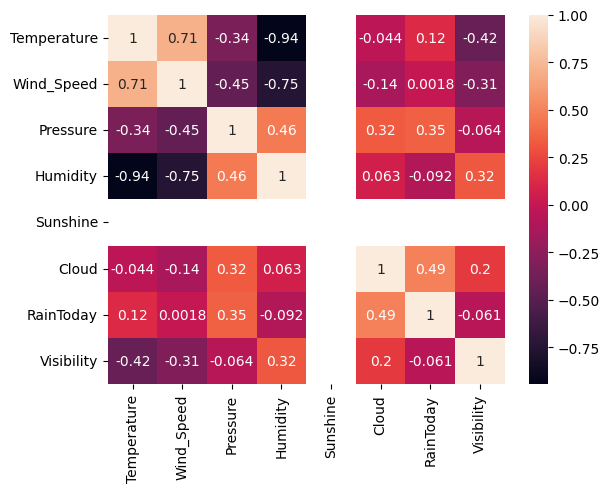

In [39]:
#seaborn heatmap
corrMatrix = weather_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

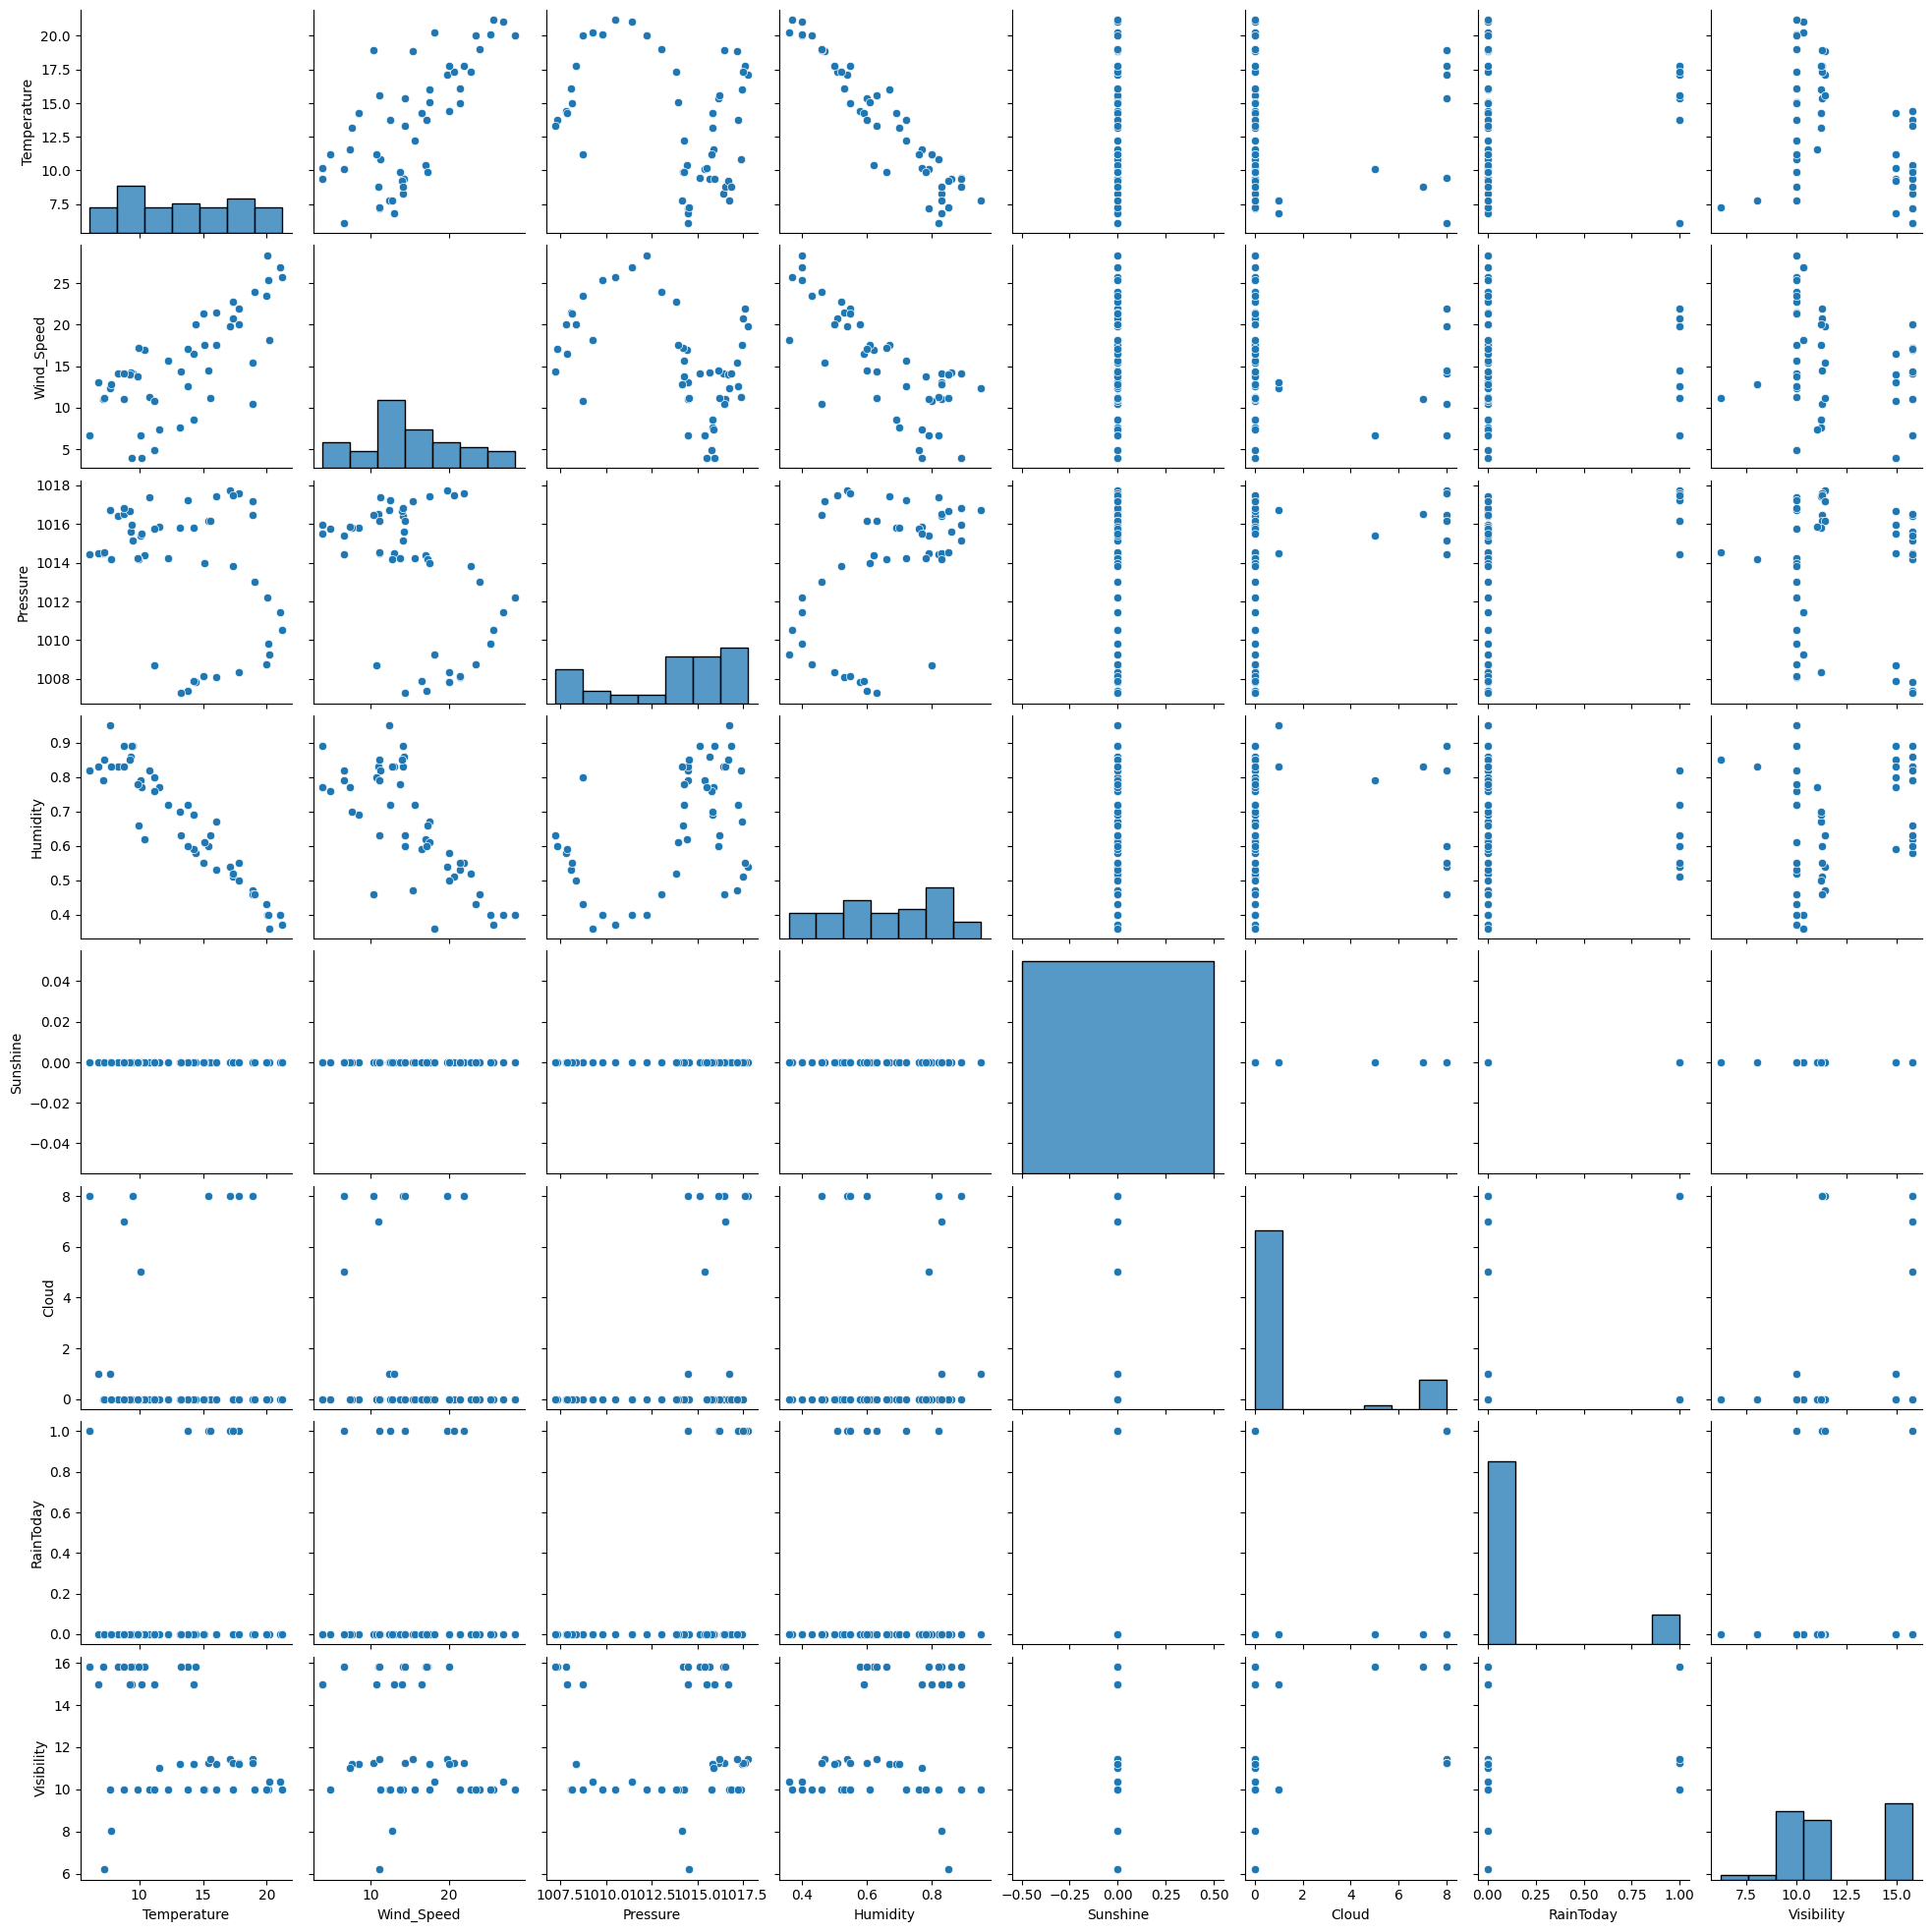

In [40]:
#seaborn pairplot
sns.pairplot(weather_data)

**Q** Based on the heat map and your visualisations on relationships, which two variables (one for input (x) and another for output (y) would you consider most appropriate for doing a linear regression analysis?

**Svar:** Värmekartan visar att det finns en stark positiv korrelation mellan temperatur och luftfuktighet. Det betyder att när temperaturen ökar tenderar även luftfuktigheten att öka. Detta beror på att varm luft kan hålla mer vattenånga än kall luft.

HINT! THe table below (from [this page](https://www.statology.org/what-is-a-strong-correlation/))helps you interpret the heatmap. **A must in a linear regression model is to have a linear relationship between the variables, a negative relationships is also a relationship, see the lecture notes from the descriptive analysis lecture!**

r in the table below is the Pearson correlation coefficient that pandas calculate for us (Note that it it the absolut value of r, the correclation coefficent can be both negative and positive). Also see [pandas documentation on correlation calculations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

| Absolute value of r    | Strength of relationship|        
|------------------------|-------------------------|
| r < 0.25               |No relationship          |
| 0.25 < r < 0.5         |Weak relationship        |
| 0.5 < r < 0.75         |Moderate relationship    |
| r > 0.75               |Strong relationship      |


**Q** Which column should represent the independent variable, x, and the dependent variable, y (the one you want to predict). In order to get the best possible prediction of y?
Motivate your answer

**svar:** Tempraturen på x-axeln och luftfuktigheten på y-axeln - Eftersom värme brukar vara en beroendefaktor så har vi den på x-axeln.

**C** Investigate if there are any outliers in the two variables you have chosen, if so, handle them in a suitable way.

**Q** Why did you choose to handle/not handle the outliers in the two variables?

**svar:** vi har tagit bort alla nollvärden och NA som fanns och ändra RainToday till att bli Float64 så att allt är enhetligt.  

In [41]:
weather_data.dtypes

Temperature    float64
Wind_Speed     float64
Pressure       float64
Humidity       float64
Sunshine       float64
Cloud          float64
RainToday      float64
Visibility     float64
dtype: object

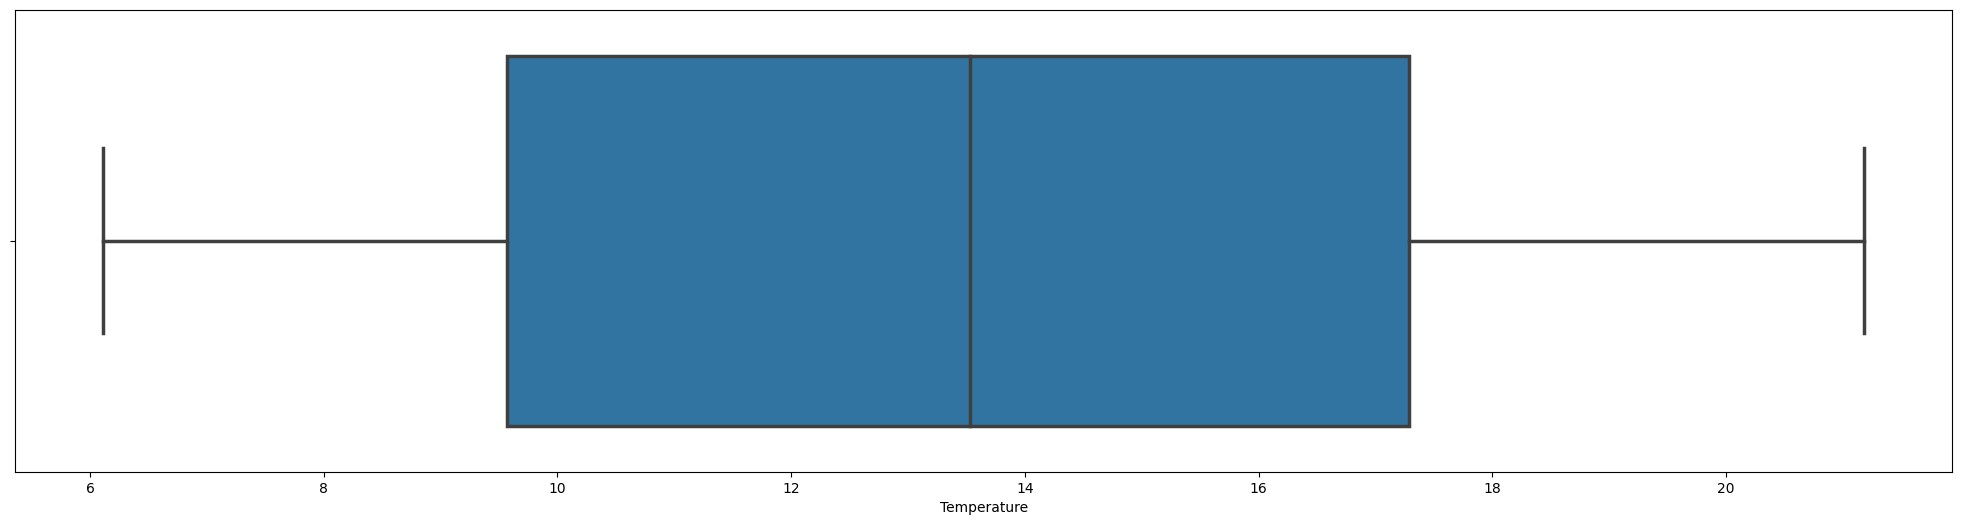

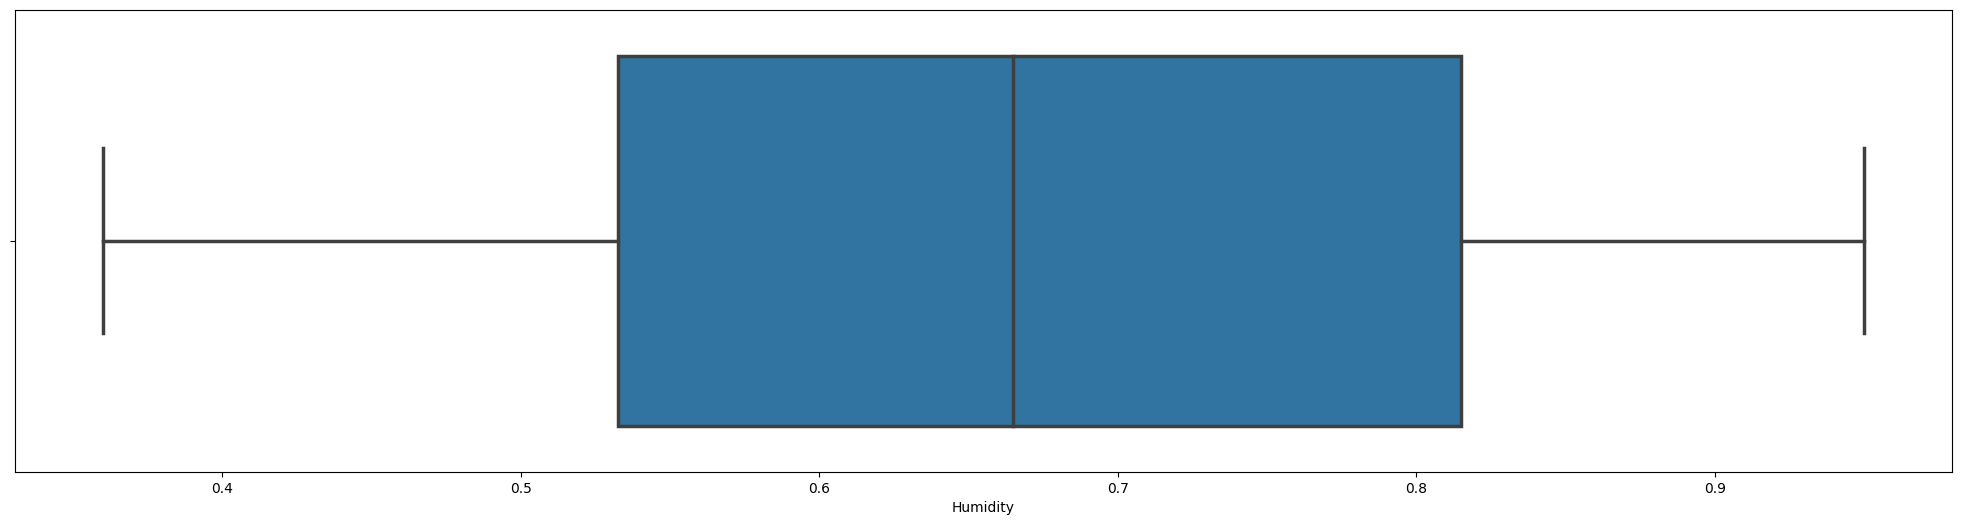

In [42]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)

plot_outlier(weather_data['Temperature'])
plot_outlier(weather_data['Humidity'])

### Modeling

**C** Assign the correct values to x and y in the codeblock provided below. (NOTE! You should call values().reshape() on x because scikit_learn requires input to be in the form of two dimensional arrays i.e. a numpy array (created by pandas.values() in 2D ()created by numpy.reshape()). Or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. See also [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and [scikit_learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

The code already visible below imports the correct scikit_learn model (LinearRegression) in order to perform the training. Further, code is provided that performs the splitting of data into training and test and also performs the training on the trainingdataset and prediction on both the test and training datasets.

**Q** What does the last three lines in the codeblock below do?

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Insert the correct x and y
x = weather_data[['Temperature']]
y = weather_data['Humidity']

#Split into traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#train
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

#Predict (here done on both test and traingset)
y_pred_train =lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

# skriver ut lutningen för den linjära regressionsmodellen för varje x-värde (.coef_)
# (.intercept_) visar skärningspunkterna från värdet vi tränat.
# Så dessa kodrader är esentiella för att kunna hitta samband för den tränade data att rita en linjär modell som kan förutse hur datan hänger ihop.
# #y_pred_train = theta_0 + theta_1 * x_train , alltså kofficienten * träningsdata kommer ge oss förutsedd data.
theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1





(1.1424411188585486, array([-0.03557787]))

**C** Create a new dataframe with two columns, one with the actual values in the testset and one with the predicted values on the testset.

**Q**What is your interpretation of the correctness of your model?

In [45]:
df_compare = pd.DataFrame()

# Add the actual values in the testset
df_compare['Actual'] = y_test

# Add the predicted values on the testset
df_compare['Predicted'] = y_pred_test
df_compare

,Actual,Predicted
13,0.51,0.525758
39,0.37,0.388783
30,0.85,0.884106
45,0.55,0.607982
17,0.63,0.589205
48,0.60,0.652455
26,0.80,0.744562
25,0.66,0.789825
32,0.78,0.791208
19,0.70,0.674790


**C** Code a visualization that show the result (the straight line created by fitting your model to your training data) in relation to the trainingset and another visualization that show the result in relation to the testset. Use one code cell for each coding.

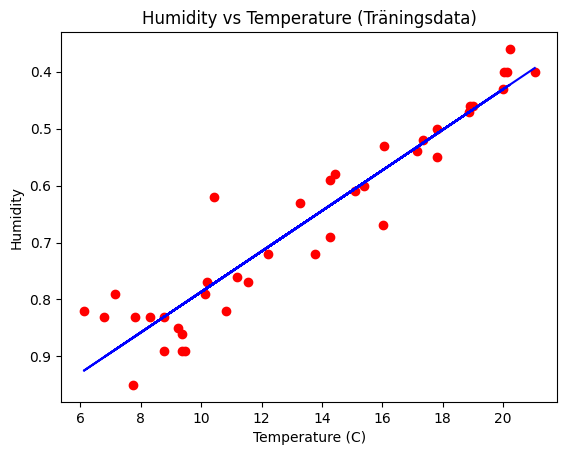

In [48]:
#Code for visualising traningdata and trained model

#y_pred_train = theta_0 + theta_1 * x_train , alltså kofficienten * träningsdata?
# Scatter-plot av de faktiska träningsdatavärdena
plt.scatter(x_train, y_train, color='red')
# Linjär regression på träningsdatan
plt.plot(x_train, y_pred_train, color='blue')
plt.title('Humidity vs Temperature (Träningsdata)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

plt.gca().invert_yaxis()



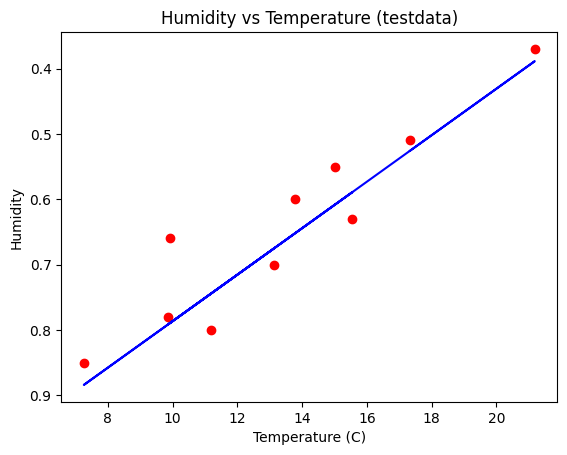

In [34]:
#Code for visualising testdata and trained model

#viz_train_pos.scatter(X_train_pos, y_train_pos, color='red')
#viz_train_pos.plot(X_train_pos, y_pred_pos, color='blue')

#y_pred_test = theta_0 + theta_1 * x_test , alltså kofficienten * testdatan

# Scatter-plot av testdatan träningsdatavärdena
plt.scatter(x_test, y_test, color='red')
# Linjär regression på träningsdatan
plt.plot(x_test, y_pred_test, color='blue')
plt.title('Humidity vs Temperature (testdata)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

# invertera
plt.gca().invert_yaxis()

**Q** What do the two above visualisation show?

Att med högre tempratur så blir luftfuktigheten lägre.

Sammbandet mellan tränsinsdata och testdatan visar att det är ungefär +- 0.1 i felmarginal och att 12 av 40 som vi får ett överstämmande värde med vad som borde vara.



**Q** Why should we always predic using the test data and not the training data?

**svar** för att den redan används för att träna modellen. Det är liksom ett steg bak, vi vill fram.


**Q** What is the preformance measures of your model? Calculate MSE, R^2 and MRSE on both test and trainingdata using skikit_learn and interpret the result.

See scikit_learn library: [MSE/MRSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), #Evaluate on trainingset [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Beräkna  MSE, R^2 och MRSE för träningsdatan
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mrse_train = np.sqrt(mse_train)

# Beräkna  MSE, R^2 och MRSE på testdatan
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mrse_test = np.sqrt(mse_test)

print('MSE på träningsdata :', mse_train)
print('R^2 på träningsdata :', r2_train)
print('MRSE på träningsdata :', mrse_train)
print('----------------------------------------------')
print('MSE på testdata :', mse_test)
print('R^2 på testdata :', r2_test)
print('MRSE på testdata:', mrse_test)

MSE på träningsdata : 0.002911681464695816
R^2 på träningsdata : 0.8970218493639797
MRSE på träningsdata : 0.05395999874625477
----------------------------------------------
MSE på testdata : 0.003023110903554006
R^2 på testdata : 0.8430775549673498
MRSE på testdata: 0.05498282371390184


In [ ]:
#Evaluate training

In [ ]:
#Evaluate test

**Q** We have learned that models always perform better on trainingset compared to testset. Is this true for your model? Investigate the different measures on the trainingset and on the testset and answer this question.

**Q** Explain how the size of the testdata might affect the performance of your model.

**Q** What can we do to to create a better model?

In order to see how or model performs we can also build a distribution plot of the actual values and the predicted values, this is done in the code below.

**Q** Interpret the curves, what does it tell about the performance of the model?

In [ ]:
sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## Multiple linear regression

### Your next task in regards to modeling is to perform a multiple linear regression in order to predic the same y.

**Q** What varaibles from your dataset are appropriate to add to x to have more variables as input? Why?

**C** Perform a multiple linear regression in a similar fashion as you did while performing the simple linear regression, start by assigning appropriate columns to X and y (y should be the same as in the simple linear regression).

*It is preferable to use other names for your variables than what you used in the simple linear regression so as not to create confusion or overwrite variables by misstake.*

**C** Evaluate your model using the same measurements as for the simple linear regression.

**C** Create a visualization that show the difference between real values and predicted values on testdata (see simple linear regression visualization).

**Q** Why is it difficult to create a visualization that show the result on training and testdata, similar to the ones we did in the simple linear regression above?

**Q** How do the models differ? Which one is better than the other? Why?

*To answer the questions and do the required coding, please use one codeblock per question to facilitate the correction of your assignment.*

In [ ]:
#Assign variables to X and y
X_ml =
y_ml =

In [ ]:
#Split the dataset in train and test


In [ ]:
#Train using trainingset and predict using testset
lm_model = LinearRegression(fit_intercept=True)


theta_0 = lm_model.intercept_
theta_1 = lm_model.coef_
theta_0, theta_1

In [ ]:
#Visualize the difference between real values and predicted values on testdata

In [ ]:
#Evaluate

## Multiple linear regression on a real dataset

**C** Test to train and test a multiple linear regression models using the real historical dataset called weatherHistory.csv as input data instead (use the same columns for x and y but get them from this dataset instead). *Please observe that you need to make sure there are no N/A values or outliers in the two independent variables in the new dataset. You can skip the rest of the columns since you will not use them.*

**Q** Write a short note on how it performs compared to the artificial data in the dataset you used in the lab so far. Elaborate on the reasons why the performance is different.